In [ ]:
# boxes 的形式为 （xmin, ymin, xmax, ymax）
import torchvision.transforms.functional as F

class RandomHorizontalFlip(object):
    def __init__(self, p=0.5):
        self.p = p

    def __call__(self, img, target):
        if random.random() < self.p:
            return hflip(img, target)
        return img, target


def hflip(image, target):
    flipped_image = F.hflip(image)

    w, h = image.size

    target = target.copy()
    if "boxes" in target:
        boxes = target["boxes"]
        boxes = boxes[:, [2, 1, 0, 3]] * torch.as_tensor([-1, 1, -1, 1]) + torch.as_tensor([w, 0, w, 0])
        target["boxes"] = boxes

    return flipped_image, target


img, target = RandomHorizontalFlip()(img, target)

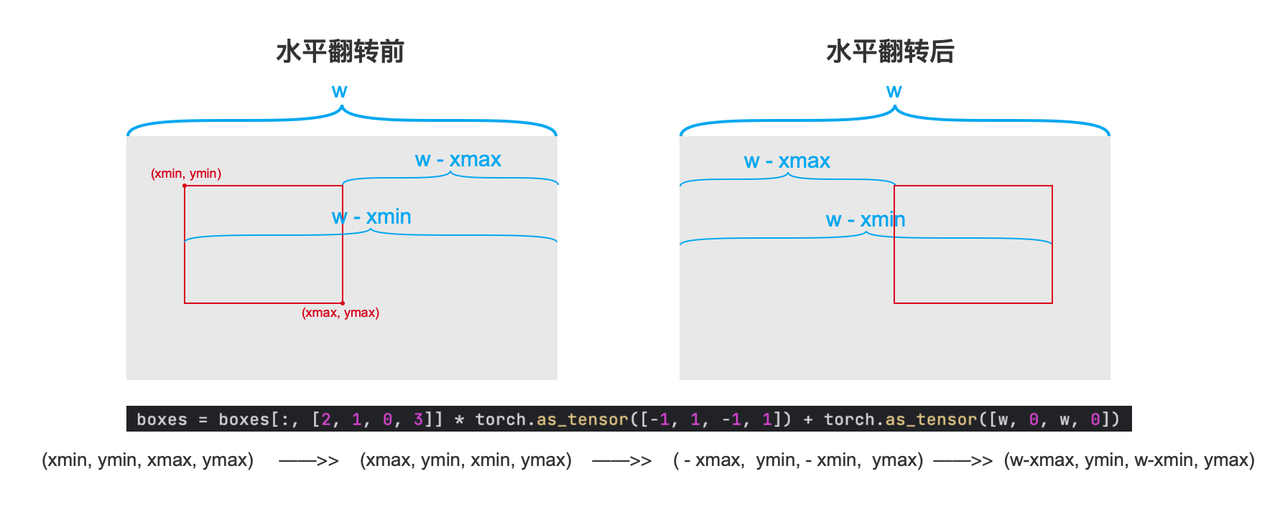